In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Grazie Lowrenzo for Data Preparation

## <3 <3 <3

In [2]:
df = pd.read_csv("kids_train_cleaned.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,PurchMonth,PurchDay,PurchWeekDay,EngineLiters,NumCylinders,4X4,WheelDrive,NumDoors,PCA1,PCA2
0,326,1,10/25/2010,ADESA,2008.0,2.0,KIA,SPECTRA,EX,SEDAN,...,10.0,25.0,Monday,4.11398,5.0,0,0,4.0,1797.080405,-753.566708
1,42991,0,5/27/2009,MANHEIM,2006.0,3.0,CHRYSLER,STRATUS,SXT,SEDAN,...,5.0,27.0,Wednesday,2.70000,6.0,0,0,4.0,-4879.356480,1637.798453
2,55273,0,3/18/2010,OTHER,2008.0,2.0,CHRYSLER,CALIBER,SE,WAGON,...,3.0,18.0,Thursday,2.31289,6.0,0,0,4.0,4349.541129,-467.358818
3,29058,0,6/8/2009,OTHER,2005.0,4.0,FORD,FREESTAR,S,MINIVAN,...,6.0,8.0,Monday,3.90000,6.0,NO,Front,5.0,-5514.286888,1633.449461
4,34991,0,3/4/2009,MANHEIM,2005.0,4.0,CHRYSLER,TOWN & COUNTRY V,Bas,MINIVAN,...,3.0,4.0,Wednesday,3.30000,4.0,NO,Front,5.0,-4594.389176,1693.004506


In [3]:
for e in df.columns:
    print(e)

RefId
IsBadBuy
PurchDate
Auction
VehYear
VehicleAge
Make
Model
Trim
SubModel
Color
Transmission
WheelType
VehOdo
Nationality
AAAP
AACP
ARAP
ARCP
CAAP
CACP
CRAP
CRCP
BYRNO
VNST
VehBCost
WarrantyCost
PurchYear
PurchMonth
PurchDay
PurchWeekDay
EngineLiters
NumCylinders
4X4
WheelDrive
NumDoors
PCA1
PCA2


In [4]:
categories = ['IsBadBuy', 'Auction', 'Make', 'Model', 'Trim', 
            'SubModel', 'Color', 'Transmission', 'Nationality', 'VNST', 'PurchWeekDay']
not_cat = ['VehOdo', 'VehBCost', 'WarrantyCost', 'AAAP', 'VehicleAge']
to_drop = ['AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 'CRAP', 'CRCP', 'NumCylinders', '4X4', 'WheelDrive',
           'NumDoors', 'PCA1', 'PCA2', 'RefId', 'PurchDate', 'WheelType', 'PurchYear', 'PurchMonth',
            'PurchDay', 'BYRNO', 'VehYear', 'EngineLiters']

In [5]:
df.drop(to_drop, axis=1, inplace=True)

In [6]:
for col in categories:
    df[col] = df[col].astype('category')
    
df['VehicleAge'] = df['VehicleAge'].astype('int')

In [7]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

## Binning

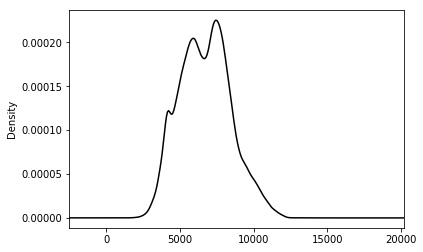

In [8]:
x = plt.xlim((-2500, 20200))
df["VehBCost"].plot.kde(x = 'x', color = 'black') 

In [9]:
bins = [df.VehBCost.min() - 1,5000, 7000, 8000, 10000, df.VehBCost.max()]

df['VehBCost'] = pd.cut(df['VehBCost'], bins)

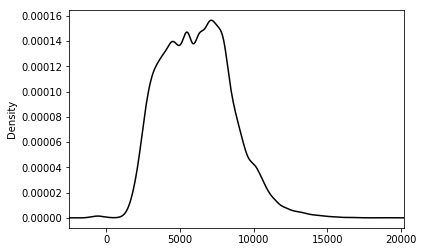

In [10]:
x = plt.xlim((-2500, 20200))
df["AAAP"].plot.kde(x = 'x', color = 'black') 

In [11]:
bins = [df.AAAP.min() - 1, 3000, 6000, 8000, 10000, df.AAAP.max()]

df['AAAP'] = pd.cut(df['AAAP'], bins)

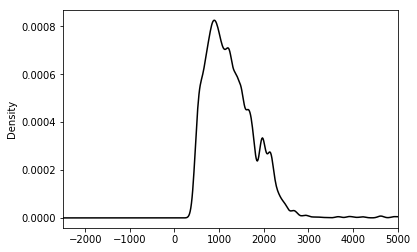

In [12]:
x = plt.xlim((-2500, 5000))
df["WarrantyCost"].plot.kde(x = 'x', color = 'black') 

In [13]:
bins = [df.WarrantyCost.min() - 1,700, 1200, 1800, 2600, df.WarrantyCost.max()]

df['WarrantyCost'] = pd.cut(df['WarrantyCost'], bins)

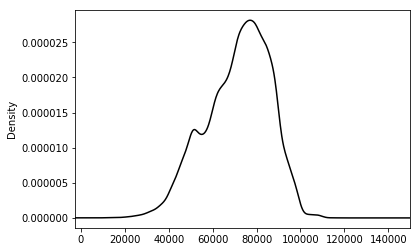

In [14]:
x = plt.xlim((-2500, 150000))
df["VehOdo"].plot.kde(x = 'x', color = 'black') 

In [15]:
bins = [df.VehOdo.min() - 1,40000, 60000, 80000, 100000, df.VehOdo.max()]

df['VehOdo'] = pd.cut(df['VehOdo'], bins)

In [16]:
df['VehicleAge'] = pd.cut(df['VehicleAge'], [0, 2, 4, 6, 8, 10], right=False)

Remapping Values

In [17]:
df.head()

,IsBadBuy,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,Nationality,AAAP,VNST,VehBCost,WarrantyCost,PurchWeekDay
0,1,ADESA,"[2, 4)",KIA,SPECTRA,EX,SEDAN,BLUE,AUTO,"(60000, 80000]",KOREAN,"(6000.0, 8000.0]",FL,"(5000.0, 7000.0]","(461, 700]",Monday
1,0,MANHEIM,"[2, 4)",CHRYSLER,STRATUS,SXT,SEDAN,SILVER,AUTO,"(80000, 100000]",AMERICAN,"(3000.0, 6000.0]",FL,"(224.0, 5000.0]","(1200, 1800]",Wednesday
2,0,OTHER,"[2, 4)",CHRYSLER,CALIBER,SE,WAGON,BLACK,AUTO,"(40000, 60000]",AMERICAN,"(8000.0, 10000.0]",OK,"(7000.0, 8000.0]","(461, 700]",Thursday
3,0,OTHER,"[4, 6)",FORD,FREESTAR,S,MINIVAN,BROWN,AUTO,"(80000, 100000]",AMERICAN,"(3000.0, 6000.0]",AZ,"(224.0, 5000.0]","(1200, 1800]",Monday
4,0,MANHEIM,"[4, 6)",CHRYSLER,TOWN & COUNTRY V,Bas,MINIVAN,BLUE,AUTO,"(60000, 80000]",AMERICAN,"(3000.0, 6000.0]",TX,"(5000.0, 7000.0]","(1200, 1800]",Wednesday


In [18]:
df['VehicleAge'] = 'Age:' + df['VehicleAge'].astype(str)
df['VehOdo'] = 'Odo:' + df['VehOdo'].astype(str)
df['AAAP'] = 'AAAP:' + df['AAAP'].astype(str)
df['WarrantyCost'] = 'WarrCost:' + df['WarrantyCost'].astype(str)
df['VehBCost'] = 'VehBCost:' + df['VehBCost'].astype(str)

df['BuyStatus'] = df['IsBadBuy'].map(
    {0: 'GoodBuy', 1: 'BadBuy'}).astype(str)
df.drop(columns=['IsBadBuy'], inplace=True)

In [19]:
df.head()

,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,Nationality,AAAP,VNST,VehBCost,WarrantyCost,PurchWeekDay,BuyStatus
0,ADESA,"Age:[2, 4)",KIA,SPECTRA,EX,SEDAN,BLUE,AUTO,"Odo:(60000, 80000]",KOREAN,"AAAP:(6000.0, 8000.0]",FL,"VehBCost:(5000.0, 7000.0]","WarrCost:(461, 700]",Monday,BadBuy
1,MANHEIM,"Age:[2, 4)",CHRYSLER,STRATUS,SXT,SEDAN,SILVER,AUTO,"Odo:(80000, 100000]",AMERICAN,"AAAP:(3000.0, 6000.0]",FL,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]",Wednesday,GoodBuy
2,OTHER,"Age:[2, 4)",CHRYSLER,CALIBER,SE,WAGON,BLACK,AUTO,"Odo:(40000, 60000]",AMERICAN,"AAAP:(8000.0, 10000.0]",OK,"VehBCost:(7000.0, 8000.0]","WarrCost:(461, 700]",Thursday,GoodBuy
3,OTHER,"Age:[4, 6)",FORD,FREESTAR,S,MINIVAN,BROWN,AUTO,"Odo:(80000, 100000]",AMERICAN,"AAAP:(3000.0, 6000.0]",AZ,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]",Monday,GoodBuy
4,MANHEIM,"Age:[4, 6)",CHRYSLER,TOWN & COUNTRY V,Bas,MINIVAN,BLUE,AUTO,"Odo:(60000, 80000]",AMERICAN,"AAAP:(3000.0, 6000.0]",TX,"VehBCost:(5000.0, 7000.0]","WarrCost:(1200, 1800]",Wednesday,GoodBuy


In [20]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

## Guidelines for the task on Association Rules Mining

-Frequent patterns extraction with different values of support and different types (i.e. frequent, close, maximal), (6 points)

-Discussion of the most interesting frequent patterns and analyze how changes the number of patterns w.r.t. the min_sup parameter (7 points)
    
-Association rules extraction with different values of confidence (6 points)
    
-Discussion of the most interesting rules and analyze how changes the number of rules w.r.t. the min_conf parameter, histogram of rules' confidence and lift (7 points)
    
-Use the most meaningful rules to replace missing values and evaluate the accuracy (2 points)

-Use the most meaningful rules to predict the target variable and evaluate the accuracy (2 points)

## APRIORI

In [22]:
from fim import apriori

In [23]:
#in questo modo creiamo i baskets, cioé selezioniamo gli attributi per ogni riga corrispondente
baskets = df.values.tolist()

## Itemset Frequenti


In [114]:
#supporto 2
itemsets = apriori(baskets, supp=20, zmin=4, target='a')

In [115]:
print('Number of itemsets:', len(itemsets))

itemsets[0]

Number of itemsets: 29


(('Tuesday', 'AMERICAN', 'GoodBuy', 'AUTO'), 11830)

In [101]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [110]:
itemsets

[(('Tuesday', 'AMERICAN', 'GoodBuy', 'AUTO'), 11830),
 (('AAAP:(6000.0, 8000.0]', 'AMERICAN', 'GoodBuy', 'AUTO'), 13363),
 (('Odo:(80000, 100000]', 'AMERICAN', 'GoodBuy', 'AUTO'), 12946),
 (('CHRYSLER', 'GoodBuy', 'AUTO', 'AMERICAN'), 16205),
 (('Wednesday', 'AMERICAN', 'GoodBuy', 'AUTO'), 13486),
 (('WarrCost:(1200, 1800]', 'AMERICAN', 'GoodBuy', 'AUTO'), 15674),
 (('Age:[2, 4)', 'AMERICAN', 'GoodBuy', 'AUTO'), 14704),
 (('GM', 'SEDAN', 'AUTO', 'AMERICAN'), 12561),
 (('GM', 'GoodBuy', 'AUTO', 'AMERICAN'), 17071),
 (('WarrCost:(700, 1200]', 'SEDAN', 'GoodBuy', 'AUTO'), 11953),
 (('WarrCost:(700, 1200]', 'AMERICAN', 'GoodBuy', 'AUTO'), 15745),
 (('VehBCost:(5000.0, 7000.0]', 'SEDAN', 'GoodBuy', 'AUTO'), 12140),
 (('VehBCost:(5000.0, 7000.0]', 'AMERICAN', 'GoodBuy', 'AUTO'), 15619),
 (('AAAP:(3000.0, 6000.0]', 'SEDAN', 'GoodBuy', 'AUTO'), 12112),
 (('AAAP:(3000.0, 6000.0]', 'AMERICAN', 'GoodBuy', 'AUTO'), 15727),
 (('Age:[4, 6)', 'MANHEIM', 'GoodBuy', 'AUTO'), 11799),
 (('Age:[4, 6)', 'A

## how changes the number of patterns with target "all"

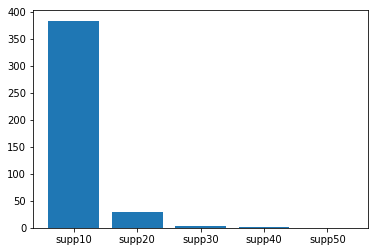

In [164]:
#rappresento graficamente come cambia il numero di pattern al cambiare del supporto

height = [383, 29, 3, 1, 0]
bars = ('supp10', 'supp20', 'supp30', 'supp40', 'supp50')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()



## Itemset Massimali

In [179]:
itemsets = apriori(baskets, supp=30, zmin=4, target='m')

In [180]:
print('Number of itemsets:', len(itemsets))

itemsets[1]

Number of itemsets: 3


(('MANHEIM', 'AMERICAN', 'GoodBuy', 'AUTO'), 23424)

In [181]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [182]:
itemsets[:10]

[(('MANHEIM', 'AMERICAN', 'GoodBuy', 'AUTO'), 23424),
 (('SEDAN', 'AMERICAN', 'GoodBuy', 'AUTO'), 23217),
 (('Odo:(60000, 80000]', 'AMERICAN', 'GoodBuy', 'AUTO'), 19499)]

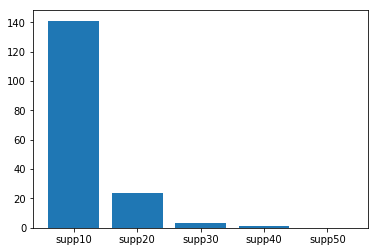

In [183]:
height = [141, 24, 3, 1, 0]
bars = ('supp10', 'supp20', 'supp30', 'supp40', 'supp50')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

##  Itemset Closed

In [192]:
itemsets = apriori(baskets, supp=20, zmin=4, target='c')

In [193]:
print('Number of itemsets:', len(itemsets))

itemsets[1]

Number of itemsets: 29


(('AAAP:(6000.0, 8000.0]', 'AMERICAN', 'GoodBuy', 'AUTO'), 13363)

In [194]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [195]:
itemsets

[(('MANHEIM', 'AMERICAN', 'GoodBuy', 'AUTO'), 23424),
 (('SEDAN', 'AMERICAN', 'GoodBuy', 'AUTO'), 23217),
 (('Odo:(60000, 80000]', 'AMERICAN', 'GoodBuy', 'AUTO'), 19499),
 (('GM', 'AMERICAN', 'GoodBuy', 'AUTO'), 17071),
 (('Age:[4, 6)', 'AMERICAN', 'GoodBuy', 'AUTO'), 16826),
 (('CHRYSLER', 'AMERICAN', 'GoodBuy', 'AUTO'), 16205),
 (('MANHEIM', 'SEDAN', 'GoodBuy', 'AUTO'), 16057),
 (('WarrCost:(700, 1200]', 'AMERICAN', 'GoodBuy', 'AUTO'), 15745),
 (('AAAP:(3000.0, 6000.0]', 'AMERICAN', 'GoodBuy', 'AUTO'), 15727),
 (('WarrCost:(1200, 1800]', 'AMERICAN', 'GoodBuy', 'AUTO'), 15674),
 (('VehBCost:(5000.0, 7000.0]', 'AMERICAN', 'GoodBuy', 'AUTO'), 15619),
 (('Age:[2, 4)', 'AMERICAN', 'GoodBuy', 'AUTO'), 14704),
 (('MANHEIM', 'SEDAN', 'AMERICAN', 'AUTO'), 14321),
 (('Odo:(60000, 80000]', 'MANHEIM', 'GoodBuy', 'AUTO'), 13930),
 (('Odo:(60000, 80000]', 'SEDAN', 'GoodBuy', 'AUTO'), 13577),
 (('Wednesday', 'AMERICAN', 'GoodBuy', 'AUTO'), 13486),
 (('AAAP:(6000.0, 8000.0]', 'AMERICAN', 'GoodBuy', 

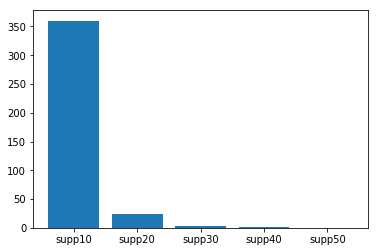

In [196]:
height = [360, 24, 3, 1, 0]
bars = ('supp10', 'supp20', 'supp30', 'supp40', 'supp50')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

## prova a caso


In [136]:
dfcazzo = df.drop(columns=['Auction', 'Color','Transmission','PurchWeekDay','BuyStatus'])

In [137]:
dfcazzo.head()

,VehicleAge,Make,Model,Trim,SubModel,VehOdo,Nationality,AAAP,VNST,VehBCost,WarrantyCost
0,"Age:[2, 4)",KIA,SPECTRA,EX,SEDAN,"Odo:(60000, 80000]",KOREAN,"AAAP:(6000.0, 8000.0]",FL,"VehBCost:(5000.0, 7000.0]","WarrCost:(461, 700]"
1,"Age:[2, 4)",CHRYSLER,STRATUS,SXT,SEDAN,"Odo:(80000, 100000]",AMERICAN,"AAAP:(3000.0, 6000.0]",FL,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]"
2,"Age:[2, 4)",CHRYSLER,CALIBER,SE,WAGON,"Odo:(40000, 60000]",AMERICAN,"AAAP:(8000.0, 10000.0]",OK,"VehBCost:(7000.0, 8000.0]","WarrCost:(461, 700]"
3,"Age:[4, 6)",FORD,FREESTAR,S,MINIVAN,"Odo:(80000, 100000]",AMERICAN,"AAAP:(3000.0, 6000.0]",AZ,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]"
4,"Age:[4, 6)",CHRYSLER,TOWN & COUNTRY V,Bas,MINIVAN,"Odo:(60000, 80000]",AMERICAN,"AAAP:(3000.0, 6000.0]",TX,"VehBCost:(5000.0, 7000.0]","WarrCost:(1200, 1800]"


In [138]:
baskets2 = dfcazzo.values.tolist()

In [152]:
#supporto 2
itemsets2 = apriori(baskets2, supp=10, zmin=3, target='a')

In [153]:
print('Number of itemsets:', len(itemsets2))

itemsets2[0]

Number of itemsets: 71


(('LS', 'GM', 'AMERICAN'), 6303)

In [154]:
itemsets2.sort(key=lambda x: x[1],reverse=True)

In [155]:
itemsets2

[(('GM', 'SEDAN', 'AMERICAN'), 12867),
 (('Odo:(60000, 80000]', 'SEDAN', 'AMERICAN'), 12534),
 (('WarrCost:(700, 1200]', 'SEDAN', 'AMERICAN'), 11711),
 (('AAAP:(3000.0, 6000.0]', 'SEDAN', 'AMERICAN'), 11472),
 (('VehBCost:(5000.0, 7000.0]', 'SEDAN', 'AMERICAN'), 11174),
 (('AAAP:(3000.0, 6000.0]', 'Age:[4, 6)', 'AMERICAN'), 10755),
 (('Age:[4, 6)', 'SEDAN', 'AMERICAN'), 10434),
 (('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'AMERICAN'), 10201),
 (('Age:[2, 4)', 'SEDAN', 'AMERICAN'), 10198),
 (('GM', 'Odo:(60000, 80000]', 'AMERICAN'), 9958),
 (('Age:[4, 6)', 'Odo:(60000, 80000]', 'AMERICAN'), 9612),
 (('WarrCost:(1200, 1800]', 'Odo:(60000, 80000]', 'AMERICAN'), 9591),
 (('CHRYSLER', 'SEDAN', 'AMERICAN'), 9194),
 (('WarrCost:(1200, 1800]', 'SEDAN', 'AMERICAN'), 9004),
 (('AAAP:(3000.0, 6000.0]', 'Odo:(60000, 80000]', 'AMERICAN'), 8973),
 (('AAAP:(3000.0, 6000.0]', 'Age:[4, 6)', 'SEDAN'), 8668),
 (('VehBCost:(5000.0, 7000.0]', 'Odo:(60000, 80000]', 'AMERICAN'), 8570),
 (('CHRYSL

## ASSOCIATION RULES